## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
rain_df = pd.read_csv("/kaggle/input/weatheraus1/weatherAUS.csv")

In [3]:
#To show every columns in dataframe
pd.set_option('display.max_columns', None)

In [34]:
rain_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [35]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [36]:
rain_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
# Get list of categorical variables
s = (rain_df.dtypes == 'object')
object_cols = list(s[s].index)
print("Catagorical variables: ", object_cols)

Catagorical variables:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [5]:
for i in object_cols:
    print(i,rain_df[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [6]:
# Filling missing values with mode of the column in value
for i in object_cols:
    rain_df[i].fillna(rain_df[i].mode()[0], inplace= True)

In [7]:
#convert  "Rain Today" and "RainTomorrow" into binary (1/0)
rain_df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
rain_df['RainTomorrow'].replace({'No': 0, 'Yes':1}, inplace = True)

In [8]:
# Get list of neumeric variables
t = (rain_df.dtypes == 'float64')
float_cols = list(t[t].index)
print('Numeric Variables: ',float_cols)

Numeric Variables:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [9]:
for i in float_cols:
    print(i,rain_df[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609


In [10]:
# Filling missing values with median of the column in value
for i in float_cols:
    rain_df[i].fillna(rain_df[i].median(), inplace = True)

In [11]:
# let's delete the Date column, as we will not use it further in this project
rain_df.drop(columns = ['Date'],inplace = True)

In [12]:
rain_df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Checking balance of data

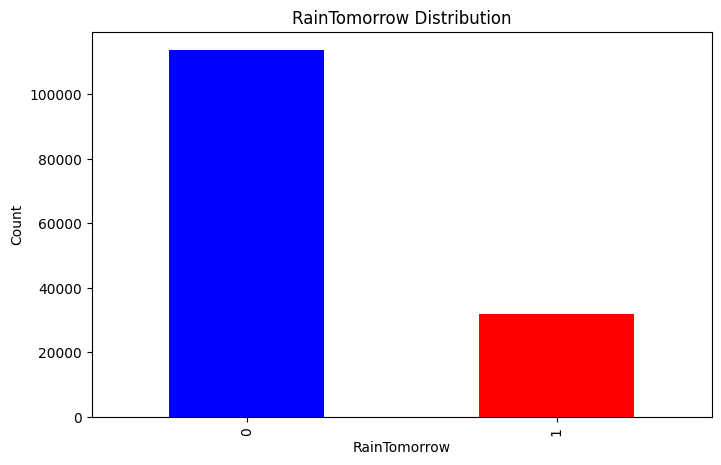

In [13]:
plt.figure(figsize = (8,5))
rain_df['RainTomorrow'].value_counts().plot(kind = 'bar',color = ['blue','red'])
plt.title('RainTomorrow Distribution')
plt.ylabel('Count')
plt.show()

In [14]:
cat_columns = rain_df.select_dtypes(include = 'object').columns.tolist()

In [15]:
# Creating dummy variables
rain_df_dummies = pd.get_dummies(rain_df, drop_first=True, dtype = 'float64') 

rain_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 111 entries, MinTemp to WindDir3pm_WSW
dtypes: float64(109), int64(2)
memory usage: 123.2 MB


In [16]:
rain_df_dummies.shape

(145460, 111)

<Axes: >

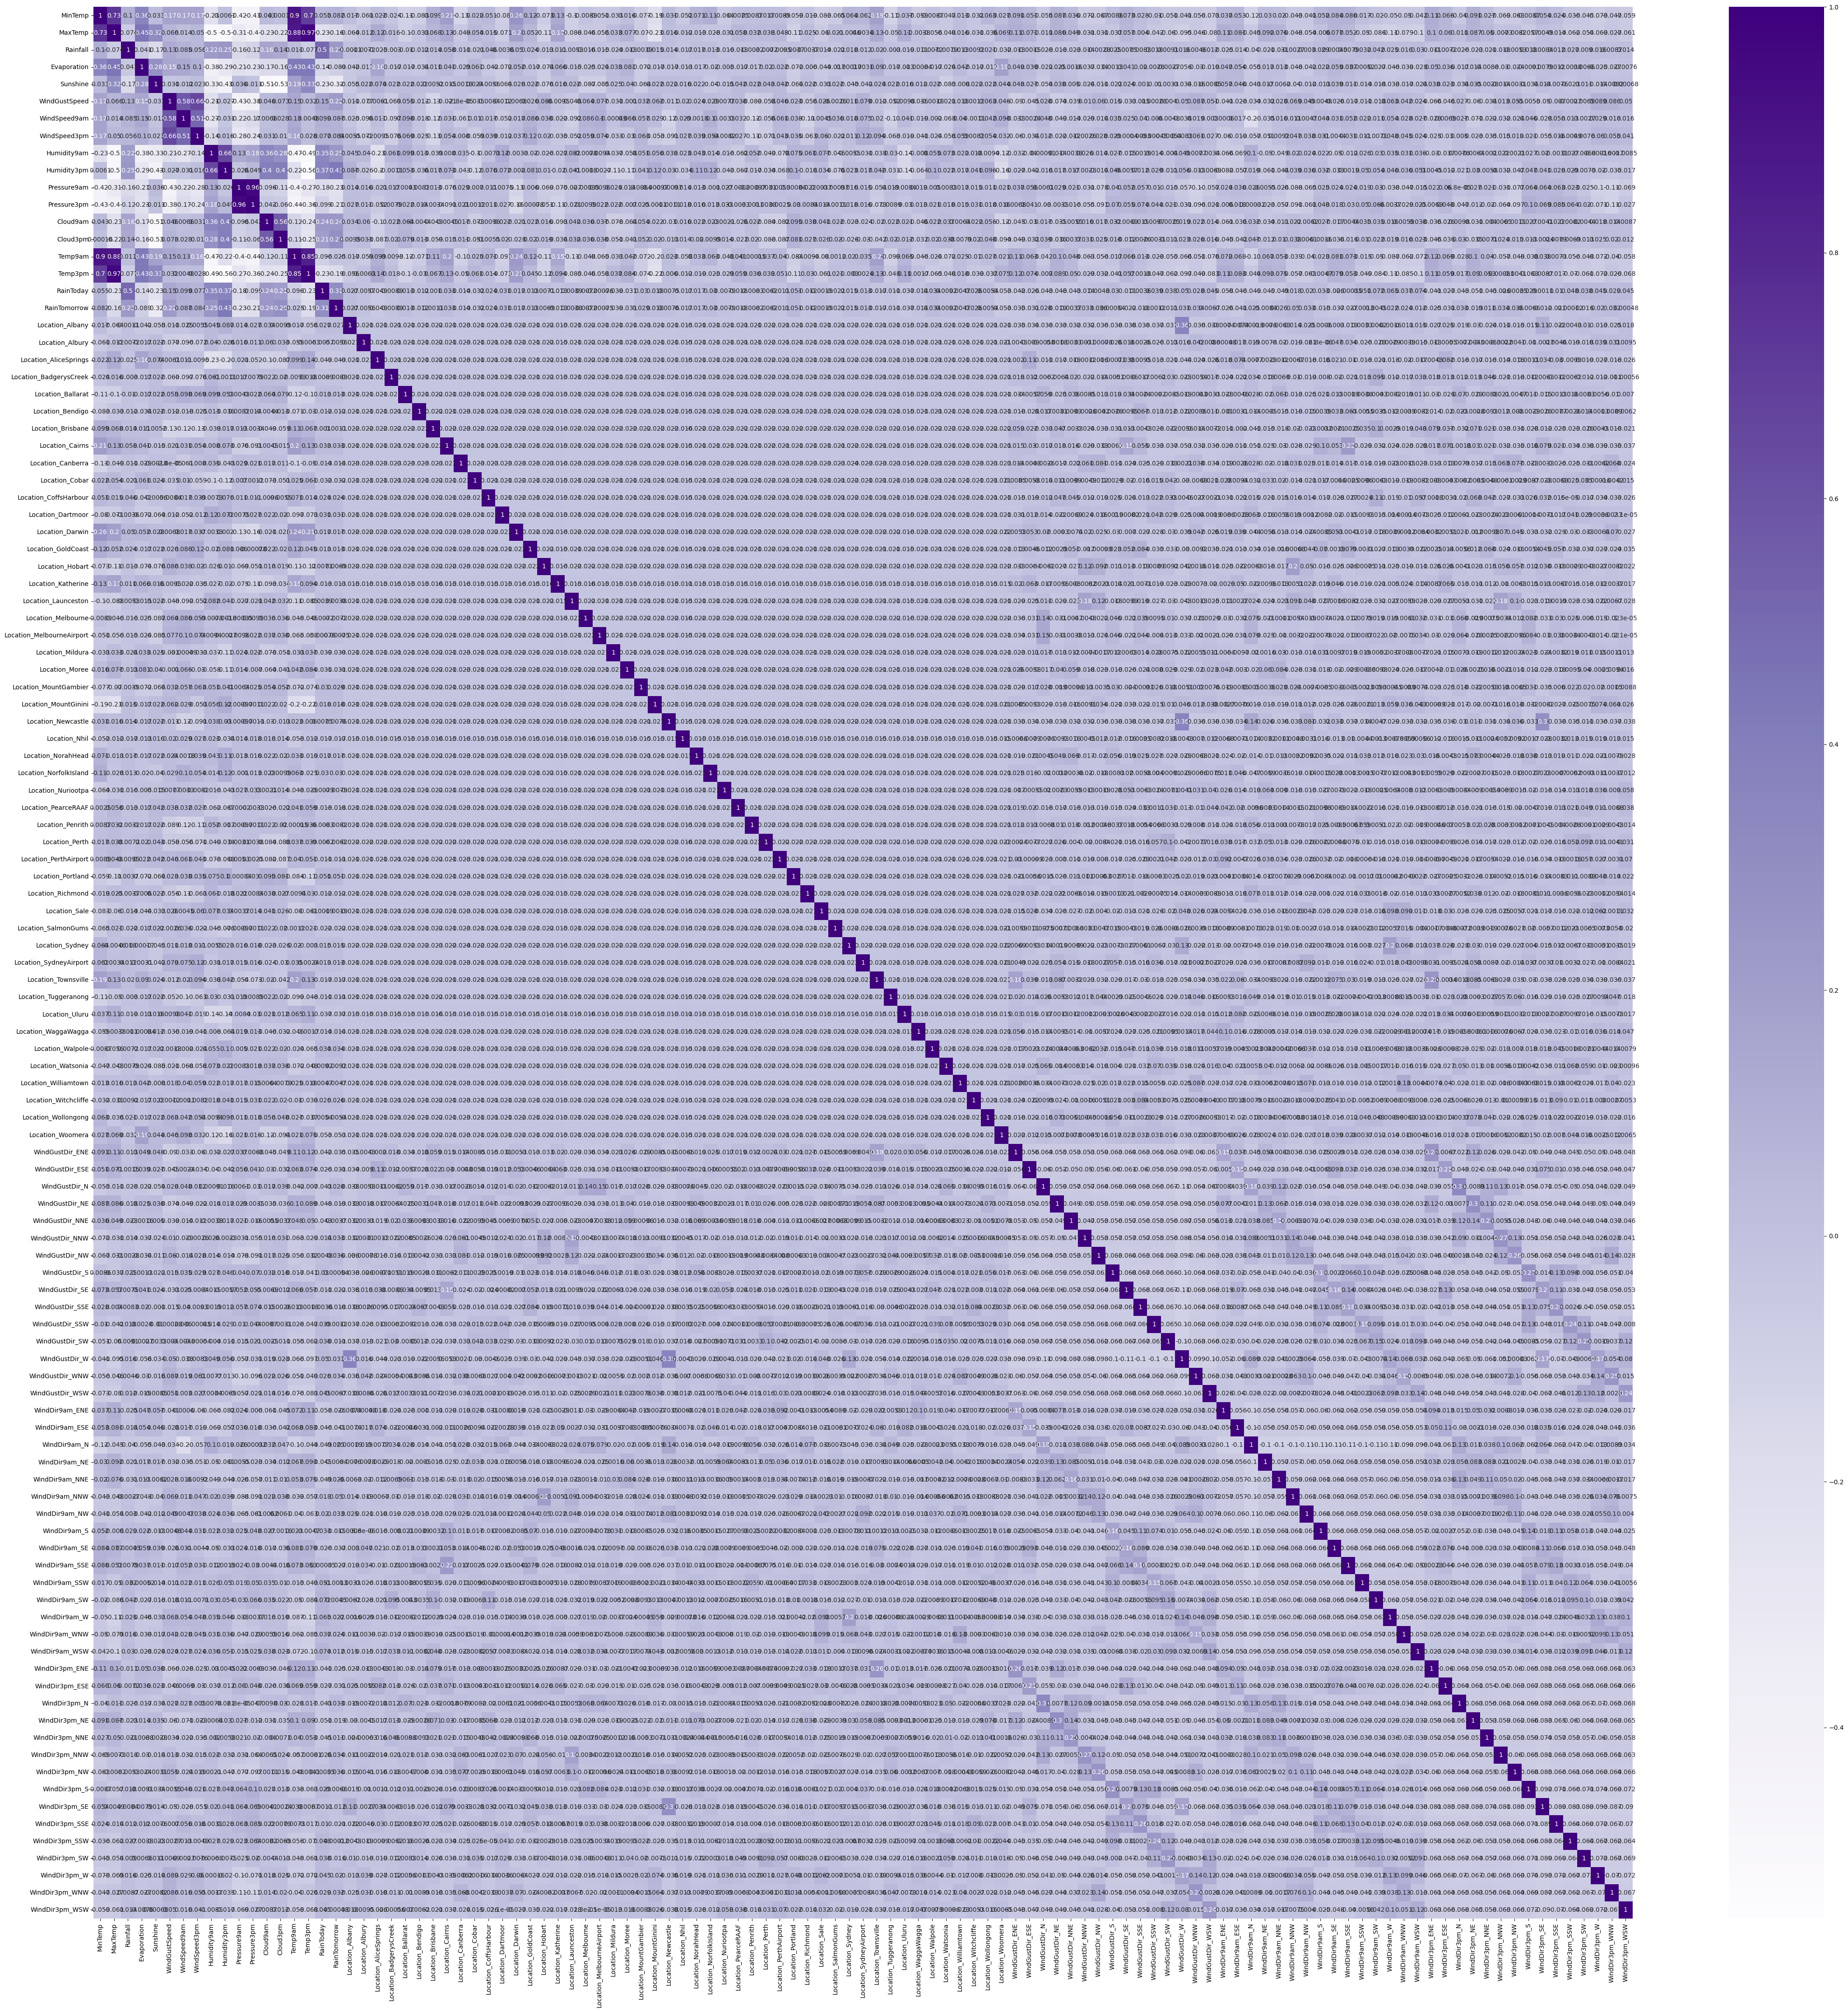

In [50]:
#build a correlation matrix
cmap = sns.diverging_palette(70,20,s=50,l=40,n=6,as_cmap = True)
corr = rain_df_dummies.corr()
f, ax = plt.subplots(figsize =(55,55))
sns.heatmap(corr,annot = True, cmap = 'Purples')

In [17]:
x = rain_df_dummies.drop(['RainTomorrow'],axis = 1).values
y = rain_df_dummies['RainTomorrow'].values
#Split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 7)
#Standardize data
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test  = scalar.transform(x_test)

### SMOTE to balacnce the imbalanced dataset

In [18]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

## KNN Model

In [19]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [20]:
acc_knn = knn.score(x_test,y_test)
pred_knn = knn.predict(x_test)
precision_knn = precision_score(y_test, pred_knn)
recall_knn = recall_score(y_test, pred_knn)
f1_knn = f1_score(y_test,pred_knn)

print("1.Accuracy: ", acc_knn)
print("2. Precision: ", precision_knn)
print("3. Recall: ", recall_knn)
print("4. f1_Score: ",f1_knn)

1.Accuracy:  0.7337412347036986
2. Precision:  0.43065400561722617
3. Recall:  0.6746987951807228
4. f1_Score:  0.5257357443160946


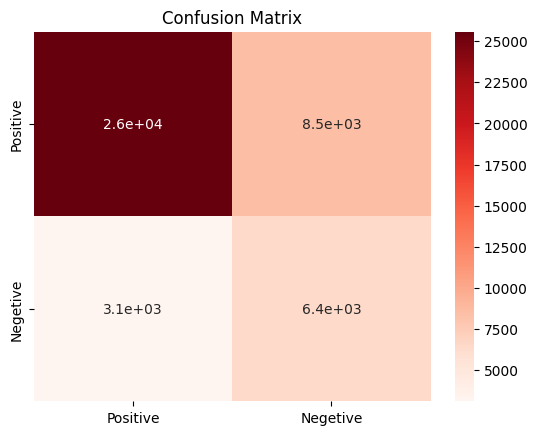

In [21]:
conf_matrix = confusion_matrix(y_test,pred_knn)
sns.heatmap(conf_matrix, annot=True, cmap='Reds',
            xticklabels=['Positive', 'Negetive'],
            yticklabels=['Positive', 'Negetive'])
plt.title('Confusion Matrix')
plt.show();

In [22]:
roc_auc_knn = roc_auc_score(y_test, pred_knn)
print("ROC AUC: ",roc_auc_knn)

ROC AUC:  0.7124850559366496


In [23]:
print("Classification Report: ",classification_report(y_test, pred_knn,
                            target_names=['No RainTomorrow','RainTomorrow']))

Classification Report:                   precision    recall  f1-score   support

No RainTomorrow       0.89      0.75      0.81     34093
   RainTomorrow       0.43      0.67      0.53      9545

       accuracy                           0.73     43638
      macro avg       0.66      0.71      0.67     43638
   weighted avg       0.79      0.73      0.75     43638



## Feature Selection with KNN

In [24]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

k = 20  # Adjust the number of features
selector = SelectKBest(mutual_info_classif, k=k)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

In [25]:
knn.fit(x_train_selected,y_train)

KNeighborsClassifier(n_neighbors=10)

In [26]:
# Predict on the test set using the selected features
pred_knn = knn.predict(x_test_selected)

# Calculate metrics using the selected features
acc_knn = knn.score(x_test_selected,y_test)
precision_knn = precision_score(y_test, pred_knn)
recall_knn = recall_score(y_test, pred_knn)
f1_knn = f1_score(y_test, pred_knn)

# Print the metrics
print("1.Accuracy: ", acc_knn)
print("2. Precision: ", precision_knn)
print("3. Recall: ", recall_knn)
print("4. F1 Score: ", f1_knn)

1.Accuracy:  0.7903432787937119
2. Precision:  0.5153989734017732
3. Recall:  0.6942902042954426
4. F1 Score:  0.5916171941257867


In [27]:
roc_auc_knn = roc_auc_score(y_test, pred_knn)
print("ROC AUC: ",roc_auc_knn)

ROC AUC:  0.7557627069346278


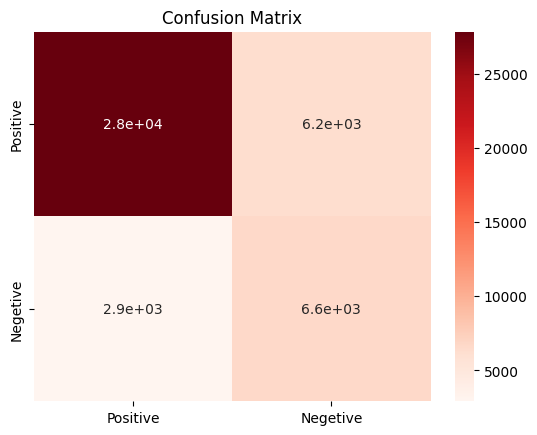

In [29]:
conf_matrix = confusion_matrix(y_test,pred_knn)
sns.heatmap(conf_matrix, annot=True, cmap='Reds',
            xticklabels=['Positive', 'Negetive'],
            yticklabels=['Positive', 'Negetive'])
plt.title('Confusion Matrix')
plt.show();

In [51]:
print("Classification Report: ",classification_report(y_test, pred_knn,
                            target_names=['No RainTomorrow','RainTomorrow']))

Classification Report:                   precision    recall  f1-score   support

No RainTomorrow       0.91      0.82      0.86     34093
   RainTomorrow       0.52      0.69      0.59      9545

       accuracy                           0.79     43638
      macro avg       0.71      0.76      0.73     43638
   weighted avg       0.82      0.79      0.80     43638



## Decision Tree

In [30]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
acc_tree = tree.score(x_test,y_test)
pred_tree = tree.predict(x_test)
precision_tree = precision_score(y_test, pred_tree)
recall_tree = recall_score(y_test, pred_tree)
f1_tree = f1_score(y_test,pred_tree)

print("1.Accuracy: ", acc_tree)
print("2. Precision: ", precision_tree)
print("3. Recall: ", recall_tree)
print("4. f1_Score: ",f1_tree)

1.Accuracy:  0.7740501397864247
2. Precision:  0.4857194668600961
3. Recall:  0.5612362493452069
4. f1_Score:  0.5207543501506756


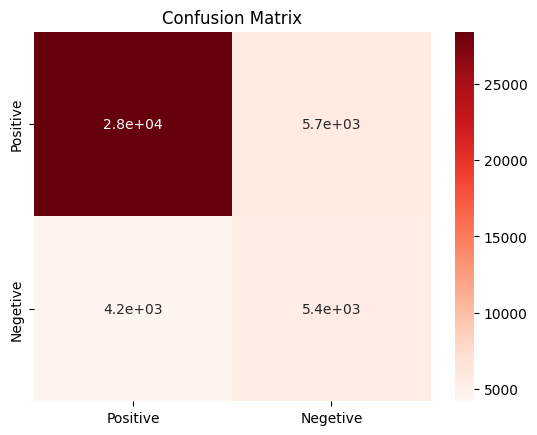

In [32]:
conf_matrix = confusion_matrix(y_test,pred_tree)
sns.heatmap(conf_matrix, annot=True, cmap='Reds',
            xticklabels=['Positive', 'Negetive'],
            yticklabels=['Positive', 'Negetive'])
plt.title('Confusion Matrix')
plt.show();

In [33]:
roc_auc_tree = roc_auc_score(y_test, pred_tree)
print("ROC AUC: ",roc_auc_tree)

ROC AUC:  0.6974338933054606


In [34]:
from sklearn.decomposition import PCA
n_components = 20  # Adjust the number of components
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [35]:
tree.fit(x_train_pca, y_train)

DecisionTreeClassifier(random_state=0)

In [36]:
pred_tree = tree.predict(x_test_pca)

In [37]:
acc_tree = tree.score(x_test_pca,y_test)
precision_tree = precision_score(y_test, pred_tree)
recall_tree = recall_score(y_test, pred_tree)
f1_tree = f1_score(y_test,pred_tree)

print("1.Accuracy: ", acc_tree)
print("2. Precision: ", precision_tree)
print("3. Recall: ", recall_tree)
print("4. f1_Score: ",f1_tree)

1.Accuracy:  0.7314267381639855
2. Precision:  0.4197476201018375
3. Recall:  0.5959140911471975
4. f1_Score:  0.49255282299965375


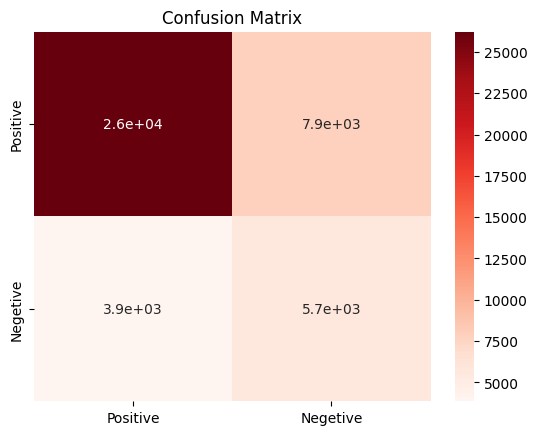

In [38]:
conf_matrix = confusion_matrix(y_test,pred_tree)
sns.heatmap(conf_matrix, annot=True, cmap='Reds',
            xticklabels=['Positive', 'Negetive'],
            yticklabels=['Positive', 'Negetive'])
plt.title('Confusion Matrix')
plt.show();

In [39]:
roc_auc_tree = roc_auc_score(y_test, pred_tree)
print("ROC AUC: ",roc_auc_tree)

ROC AUC:  0.6826401183451354


## RandomForest

In [40]:
rf = RandomForestClassifier(n_estimators=10, random_state=5)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=5)

In [41]:
acc_rf = rf.score(x_test,y_test)
pred_rf = rf.predict(x_test)
precision_rf = precision_score(y_test, pred_rf)
recall_rf = recall_score(y_test, pred_rf)
f1_rf = f1_score(y_test,pred_rf)

print("1.Accuracy: ", acc_rf)
print("2. Precision: ", precision_rf)
print("3. Recall: ", recall_rf) 
print("4. f1_Score: ",f1_rf)

1.Accuracy:  0.832760438150236
2. Precision:  0.6299294553024171
3. Recall:  0.5706652697747512
4. f1_Score:  0.598834652594547


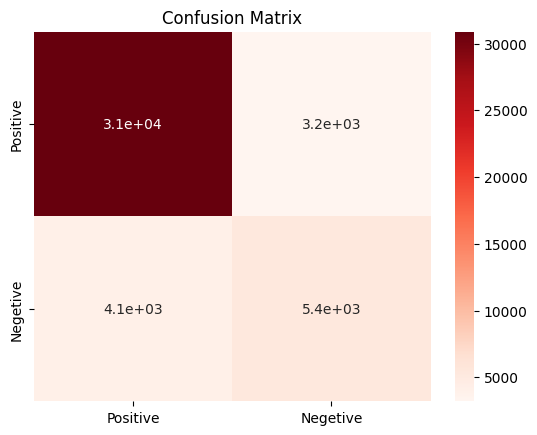

In [42]:
conf_matrix = confusion_matrix(y_test,pred_rf)
sns.heatmap(conf_matrix, annot=True, cmap='Reds',
            xticklabels=['Positive', 'Negetive'],
            yticklabels=['Positive', 'Negetive'])
plt.title('Confusion Matrix')
plt.show();

In [43]:
roc_auc_rf = roc_auc_score(y_test, pred_rf)
print("ROC AUC: ",roc_auc_rf)

ROC AUC:  0.738402179955278


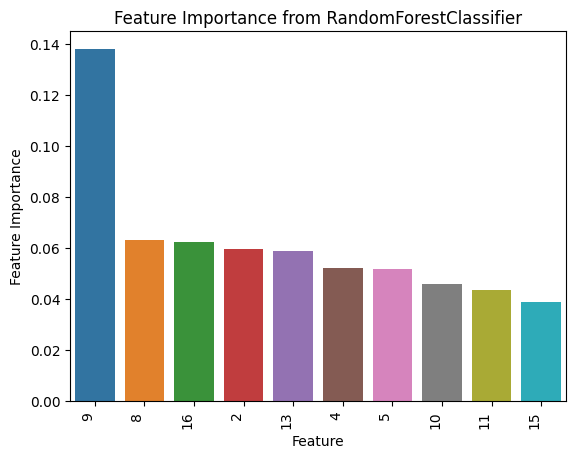

In [47]:
feature_names = [f"{i}" for i in range(x_train.shape[1])]
tmp = pd.DataFrame({'Feature': feature_names, 'Feature Importance' : rf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance', ascending = False)
s = sns.barplot(x = 'Feature',y = 'Feature Importance', data = tmp.head(10))
plt.title('Feature Importance from RandomForestClassifier')
plt.xticks(rotation = 90, ha = 'right')
plt.show()

In [95]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearch
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

In [ ]:
# Use the best parameters to create the final model
best_rf = RandomForestClassifier(random_state=5, **best_params)

# Fit the final model on the original training set
best_rf.fit(x_train, y_train)

In [ ]:
# Evaluate the final model on the test set
acc_rf = best_rf.score(x_test, y_test)
pred_rf = best_rf.predict(x_test)
precision_rf = precision_score(y_test, pred_rf)
recall_rf = recall_score(y_test, pred_rf)
f1_rf = f1_score(y_test, pred_rf)
roc_auc_rf = roc_auc_score(y_test, pred_rf)

print("Metrics for the final model:")
print("Accuracy: ", acc_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)
print("ROC AUC: ", roc_auc_rf)

## GradientBooting Model

In [48]:
gb = GradientBoostingClassifier(random_state = 10)
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=10)

In [49]:
acc_gb = gb.score(x_test,y_test)
pred_gb = gb.predict(x_test)
precision_gb = precision_score(y_test, pred_gb)
recall_gb = recall_score(y_test, pred_gb)
f1_gb = f1_score(y_test,pred_gb)

print("1.Accuracy: ", acc_gb)
print("2. Precision: ", precision_gb)
print("3. Recall: ", recall_gb)
print("4. f1_Score: ",f1_gb)

1.Accuracy:  0.8224712406618085
2. Precision:  0.5853103055608275
3. Recall:  0.6462022001047669
4. f1_Score:  0.6142508589354181


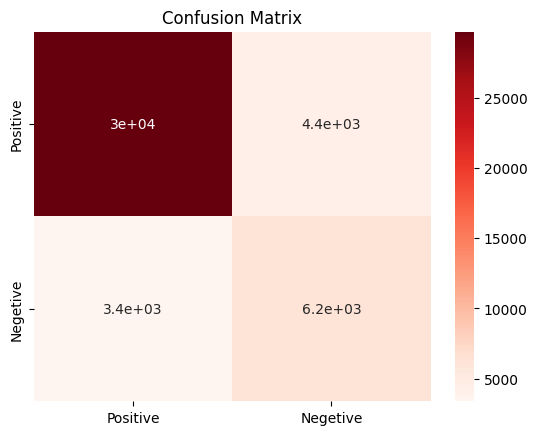

In [50]:
conf_matrix = confusion_matrix(y_test,pred_gb)
sns.heatmap(conf_matrix, annot=True, cmap='Reds',
            xticklabels=['Positive', 'Negetive'],
            yticklabels=['Positive', 'Negetive'])
plt.title('Confusion Matrix')
plt.show();

In [51]:
roc_auc_gb = roc_auc_score(y_test, pred_gb)
print("ROC AUC: ",roc_auc_gb)

ROC AUC:  0.7590116975357378


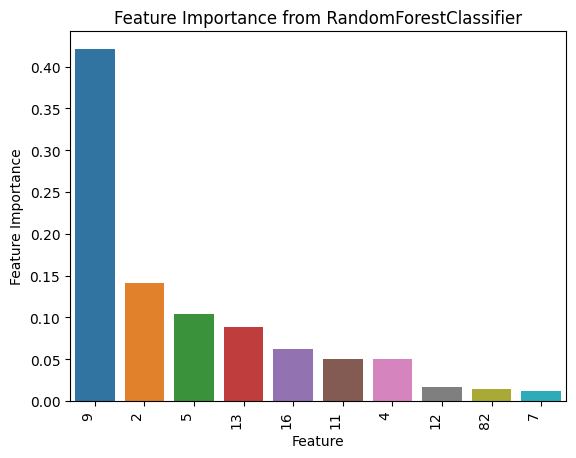

In [53]:
feature_names = [f"{i}" for i in range(x_train.shape[1])]
tmp = pd.DataFrame({'Feature': feature_names, 'Feature Importance' : gb.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance', ascending = False)
s = sns.barplot(x = 'Feature',y = 'Feature Importance', data = tmp.head(10))
plt.title('Feature Importance from RandomForestClassifier')
plt.xticks(rotation = 90, ha = 'right')
plt.show()

## XGB Model

In [54]:
xgb = XGBClassifier(random_state = 48)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=48, ...)

In [55]:
acc_xgb = xgb.score(x_test,y_test)
pred_xgb = xgb.predict(x_test)
precision_xgb = precision_score(y_test, pred_xgb)
recall_xgb = recall_score(y_test, pred_xgb)
f1_xgb = f1_score(y_test,pred_xgb)

print("1.Accuracy: ", acc_xgb)
print("2. Precision: ", precision_xgb)
print("3. Recall: ", recall_xgb)
print("4. f1_Score: ",f1_xgb)

1.Accuracy:  0.8540492231541317
2. Precision:  0.7096092925026399
3. Recall:  0.5632268203247773
4. f1_Score:  0.6280007008936394


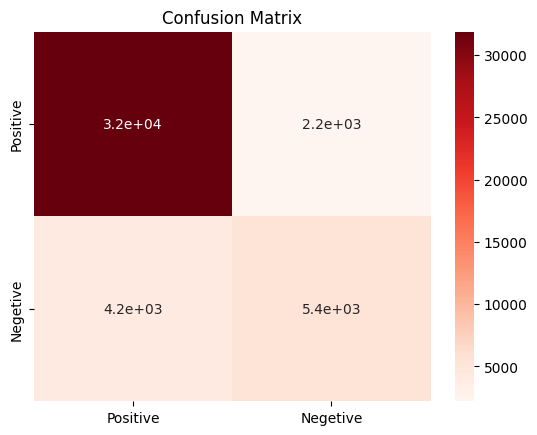

In [57]:
conf_matrix = confusion_matrix(y_test,pred_xgb)
sns.heatmap(conf_matrix, annot=True, cmap='Reds',
            xticklabels=['Positive', 'Negetive'],
            yticklabels=['Positive', 'Negetive'])
plt.title('Confusion Matrix')
plt.show();

In [58]:
roc_auc_xgb = roc_auc_score(y_test, pred_xgb)
print("ROC AUC: ",roc_auc_xgb)

ROC AUC:  0.7493487223965716


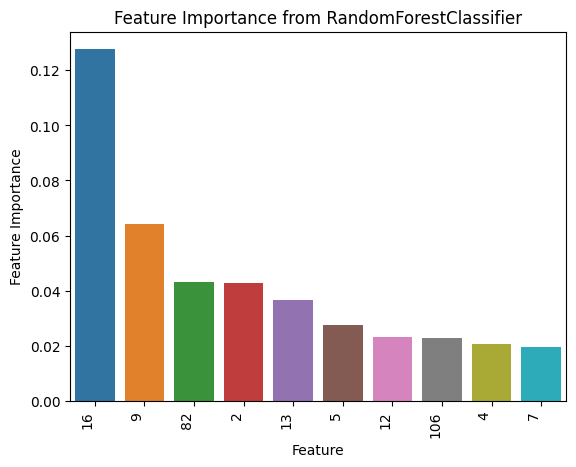

In [59]:
feature_names = [f"{i}" for i in range(x_train.shape[1])]
tmp = pd.DataFrame({'Feature': feature_names, 'Feature Importance' : xgb.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance', ascending = False)
s = sns.barplot(x = 'Feature',y = 'Feature Importance', data = tmp.head(10))
plt.title('Feature Importance from RandomForestClassifier')
plt.xticks(rotation = 90, ha = 'right')
plt.show()

In [60]:
models_acc = pd.DataFrame({
    'Model': ['Kneighbors','DecisionTree','RandomForest','GradientBoosting','XGBooster'],
    'Accuracy': [acc_knn,acc_tree,acc_rf,acc_gb,acc_xgb]
})
models_acc.sort_values(by = 'Accuracy', ascending = False)

Model  Accuracy
4         XGBooster  0.854049
2      RandomForest  0.832760
3  GradientBoosting  0.822471
0        Kneighbors  0.790343
1      DecisionTree  0.731427

In [61]:
models_ROC_AUC = pd.DataFrame({
    'Model': ['Kneighbors','DecisionTree','RandomForest','GradientBoosting','XGBooster'],
    'ROC_AUC': [roc_auc_knn,roc_auc_tree,roc_auc_rf,roc_auc_gb,roc_auc_xgb]
})
models_ROC_AUC.sort_values(by = 'ROC_AUC', ascending = False)

Model   ROC_AUC
3  GradientBoosting  0.759012
0        Kneighbors  0.755763
4         XGBooster  0.749349
2      RandomForest  0.738402
1      DecisionTree  0.682640

## XGBooster does a good job here!